In [32]:
import os
import statistics
import json
import glob
from matplotlib import pyplot as plt
from posixpath import basename
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import matplotlib
import csv

In [33]:
def read_log(solver,path):
    residual=[]
    j_file=os.path.join(path,"json","result.json")
    log_file=os.path.join(path,"output","log.txt")
    with open(j_file, 'r') as f:
        json_data = json.load(f)
    iterations=json_data["solver_info"]["num_iterations"]
    if solver=="AMGCL":
        i=0
        with open(log_file) as log:
            for line in log:
                if i<=iterations:
                    lis=line.split()
                    if (len(lis)==2) and (lis[0].isdigit()) and (int(lis[0])==i):
                        residual.append(float(lis[1]))
                        i=i+1
    if solver=="Hypre":
        i=1
        with open(log_file) as log:
            for line in log:
                if (i<=iterations):
                    lis=line.split()
                    if (len(lis)==4) and (lis[0].isdigit()) and (int(lis[0])==i):                   
                        residual.append(float(lis[3]))
                        i=i+1
    return residual

In [34]:
iters=read_log("Hypre","/home/yiwei/results/newsquare_test/Hypre/square_beam_5.0_t10/bar/P1/ref0/block3/Thread32/0")

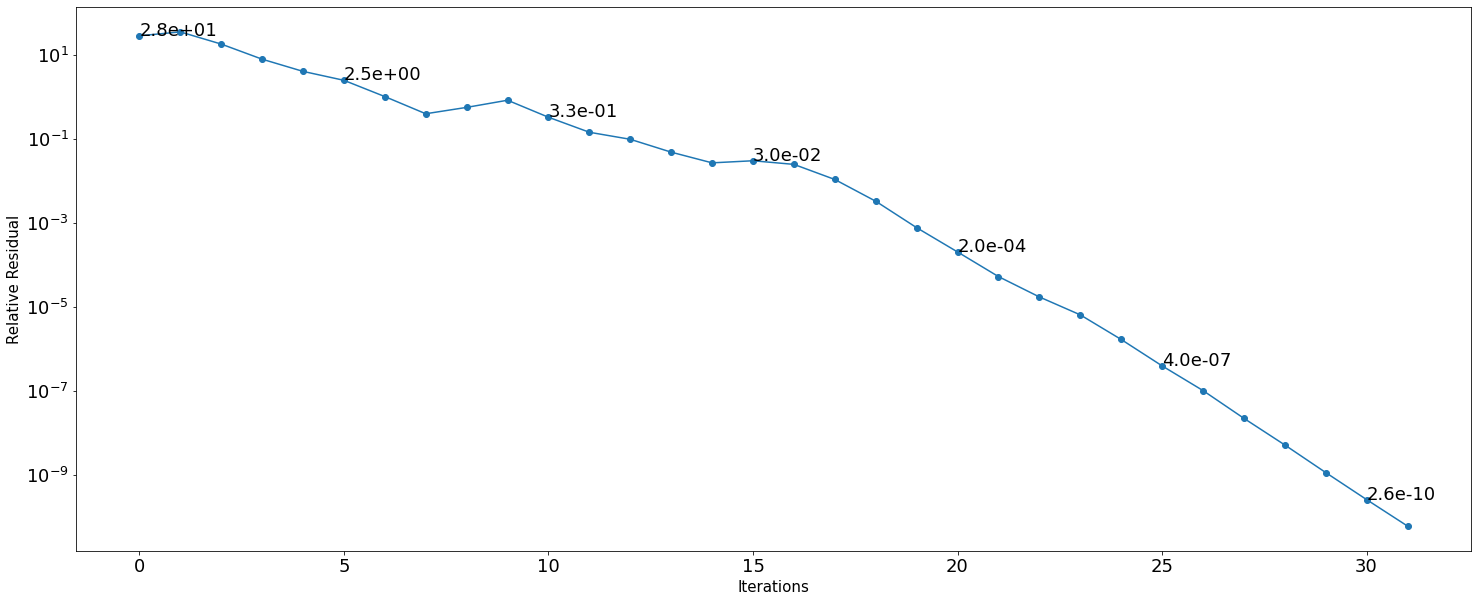

In [39]:
xdata=range(len(iters))
ydata=iters
fig,ax=plt.subplots(figsize=(25,10)) # figure size
plt.rcParams.update({'font.size': 18}) # font size
ax.set_xlabel('Iterations',fontsize=15) # x labels
ax.set_ylabel("Relative Residual",fontsize=15) # y labels
# ax_.scatter(xdata,ydata,label=label_,color=cmap_[cindex_])
ax.scatter(xdata,ydata)
ax.plot(xdata,ydata)
for i in range(len(xdata)):
    if i%5==0:
        ax.annotate('%.1e'%ydata[i], (xdata[i], ydata[i]))
plt.yscale("log") # log scale